<a href="https://colab.research.google.com/github/patramanik/CNN_project/blob/main/cnn_flower_image_classification_data_augmentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/2161283279_02ea3ff8d4.jpg'),
 PosixPath('datasets/flower_photos/dandelion/1128626197_3f52424215_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14368895004_c486a29c1e_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/61242541_a04395e6bc.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4568317687_3f89622f76.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3265902330_d8b1e44545.jpg'),
 PosixPath('datasets/flower_photos/roses/15602874619_03fd934bed.jpg'),
 PosixPath('datasets/flower_photos/roses/3560426426_1c66cb8330.jpg'),
 PosixPath('datasets/flower_photos/roses/23232710191_cc57620cd5.jpg'),
 PosixPath('datasets/flower_photos/roses/14414123198_24606fb32d.jpg')]

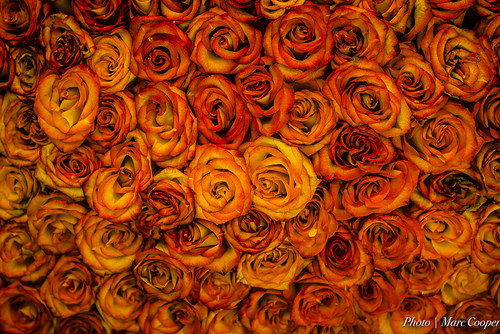

In [ ]:
PIL.Image.open(str(roses[3]))

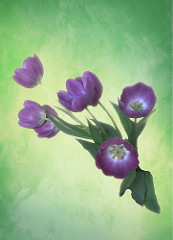

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[4]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/20825078671_90b0389c70_m.jpg'),
 PosixPath('datasets/flower_photos/roses/512694812_48ba9c0b49_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5731750490_ba3325b7ee_n.jpg'),
 PosixPath('datasets/flower_photos/roses/921138131_9e1393eb2b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8692051081_dffa8709e7_m.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/3265902330_d8b1e44545.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(421, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=1)

86/86 [==============================] - 106s 1s/step - loss: 1.3634 - accuracy: 0.4241


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 10s 351ms/step - loss: 1.1484 - accuracy: 0.5479


[1.1483784914016724, 0.5479303002357483]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 11s 374ms/step


array([[-0.01132732, -1.4441679 ,  0.15175946,  0.5802047 ,  0.04362752],
       [ 1.6338916 , -1.2568345 , -1.2869544 ,  0.11947006,  2.0236225 ],
       [ 0.07325727,  1.7512977 ,  1.7917633 , -3.0563953 ,  0.1520167 ],
       ...,
       [-2.0444267 , -2.445398  , -1.0410502 ,  2.3749716 , -0.57213914],
       [ 2.311705  , -0.7640177 , -2.1766412 , -0.98856616,  2.789652  ],
       [-1.3782881 , -2.4983273 , -1.1549208 ,  2.5139253 , -0.18938522]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

3

In [ ]:
y_test[0]

1

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.4),
  ]
)

NameError: ignored

**Original Image**

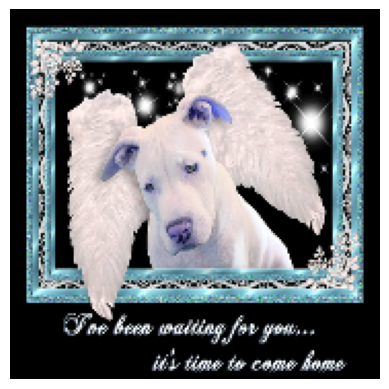

In [ ]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

NameError: ignored

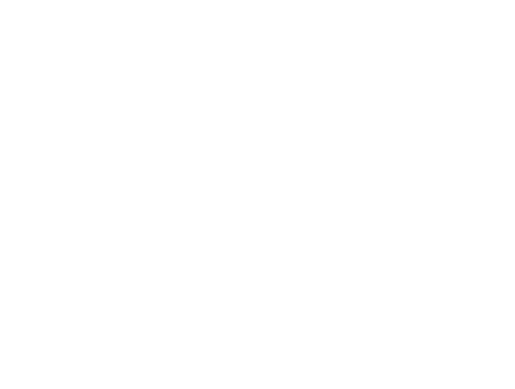

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=1)

NameError: ignored

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 132ms/step - loss: 1.3781 - accuracy: 0.4891


[1.3781402111053467, 0.4891067445278168]